# Importing Packages

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score,  recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Loading the Data

In [14]:
Data = pd.read_csv('dataset_III.csv')
Data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Visualizing

In [32]:
data1 = Data[Data['output']==1]
data2 = Data[Data['output']==0]

[]

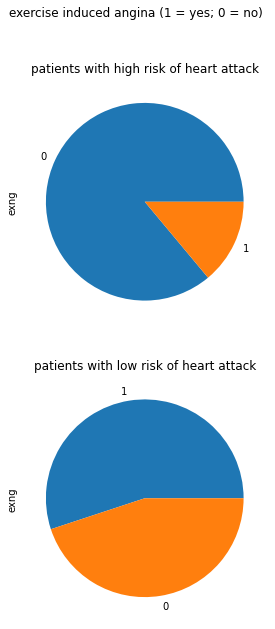

In [33]:
plt.subplot(211)
data1['exng'].value_counts().plot(kind='pie',figsize = (10, 10))
plt.title('patients with high risk of heart attack')
plt.subplot(212)
data2['exng'].value_counts().plot(kind='pie',figsize = (10, 10))
plt.title('patients with low risk of heart attack')
plt.suptitle('exercise induced angina (1 = yes; 0 = no)')
plt.plot()

[]

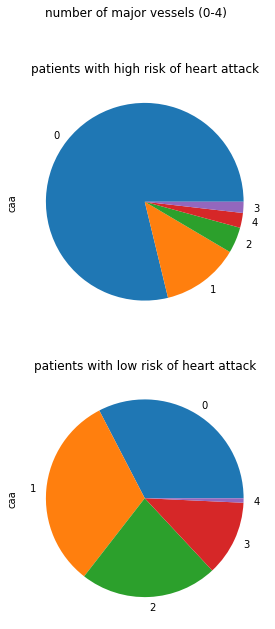

In [34]:
plt.subplot(211)
data1['caa'].value_counts().plot(kind='pie',figsize = (10, 10))
plt.title('patients with high risk of heart attack')
plt.subplot(212)
data2['caa'].value_counts().plot(kind='pie',figsize = (10, 10))
plt.title('patients with low risk of heart attack')
plt.suptitle('number of major vessels (0-4)')
plt.plot()

[]

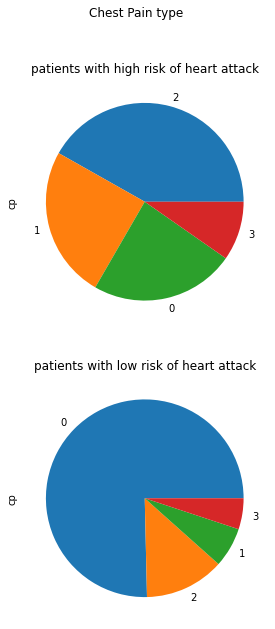

In [36]:
plt.subplot(211)
data1['cp'].value_counts().plot(kind='pie',figsize = (10, 10))
plt.title('patients with high risk of heart attack')
plt.subplot(212)
data2['cp'].value_counts().plot(kind='pie',figsize = (10, 10))
plt.title('patients with low risk of heart attack')
plt.suptitle('Chest Pain type')
plt.plot()

# Pre-Processing

In [40]:
x = np.array([Data['exng'], Data['caa'], Data['cp']]).transpose()
y = np.array(Data['output'])


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [46]:
Scaler = StandardScaler()
x_train = Scaler.fit_transform(x_train)
x_test = Scaler.transform(x_test)

# Classification

In [47]:
Model = KNeighborsClassifier(n_neighbors = 34)

In [48]:
Model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=34)

In [51]:
y_hat = Model.predict(x_test)
y_hat2 = Model.predict(x_train)

# Evaluation

For Test Set
F1 score:  0.7446808510638298
Accuracy:  0.7362637362637363
Precision:  0.7954545454545454
Recall:  0.7
Confusion Matrix: 



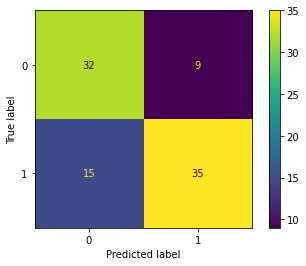


For Train Set
F1 score:  0.8255319148936171
Accuracy:  0.8066037735849056
Precision:  0.8083333333333333
Recall:  0.8434782608695652
Confusion Matrix: 



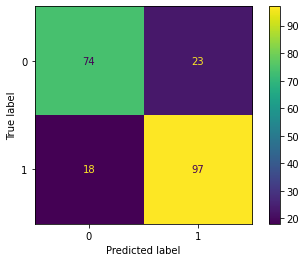

In [55]:
print('For Test Set')
f1 = f1_score(y_test, y_hat)
print('F1 score: ' , f1)

accuracy = accuracy_score(y_test, y_hat)
print('Accuracy: ' , accuracy)

precision = precision_score(y_test, y_hat)
print('Precision: ' , precision)

recall = recall_score(y_test, y_hat)
print('Recall: ' , recall)

matrix =  ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat))
print('Confusion Matrix: \n')
matrix.plot()
plt.show()

print('\nFor Train Set')
f1 = f1_score(y_train, y_hat2)
print('F1 score: ' , f1)

accuracy = accuracy_score(y_train, y_hat2)
print('Accuracy: ' , accuracy)

precision = precision_score(y_train, y_hat2)
print('Precision: ' , precision)

recall = recall_score(y_train, y_hat2)
print('Recall: ' , recall)

matrix =  ConfusionMatrixDisplay(confusion_matrix(y_train, y_hat2))
print('Confusion Matrix: \n')
matrix.plot()
plt.show()